In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score, classification_report, roc_auc_score, roc_curve, auc, recall_score, precision_score, f1_score

In [3]:
df = pd.read_csv("../data/processed/processed_data.csv")

In [26]:
X = df.drop(columns="Class")
y = df["Class"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
clf = DecisionTreeClassifier(max_depth=3, criterion='gini', min_samples_split=2, min_samples_leaf=2, min_impurity_decrease=0.0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [53]:
clf.score(X_train,y_train)

0.9468767553322729

In [54]:
y_pred =clf.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 0.95


In [56]:
report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     93775
           1       0.96      0.93      0.95     93873

    accuracy                           0.95    187648
   macro avg       0.95      0.95      0.95    187648
weighted avg       0.95      0.95      0.95    187648



In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

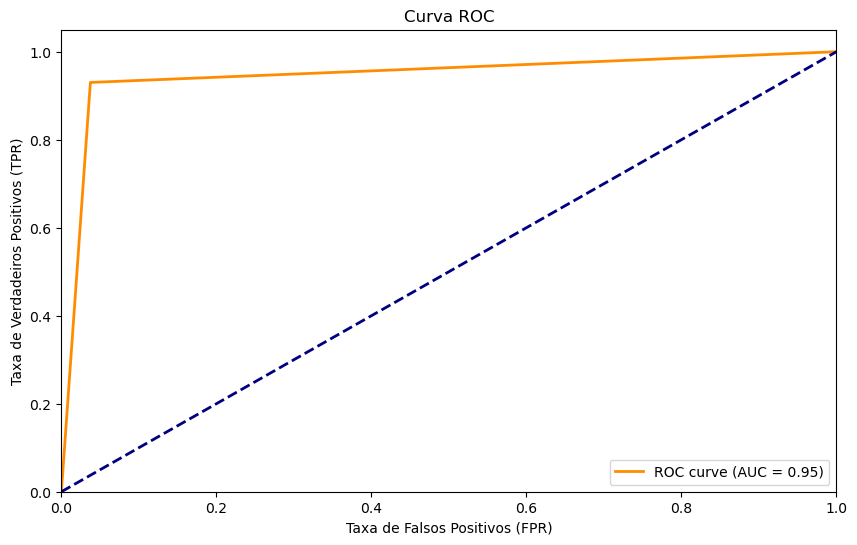

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [58]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')


In [59]:
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f'Média da precisão: {mean_accuracy:.2f}')
print(f'Desvio padrão da precisão: {std_accuracy:.2f}')


Média da precisão: 0.95
Desvio padrão da precisão: 0.00


In [60]:
print(y_train.value_counts())
print(y_test.value_counts())

0    190540
1    190442
Name: Class, dtype: int64
1    93873
0    93775
Name: Class, dtype: int64


In [61]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
matriz = confusion_matrix(y_pred, y_test)
matriz
     

array([[90269,  6554],
       [ 3506, 87319]], dtype=int64)

In [62]:
recall_score(y_test,y_pred,pos_label = 1)

0.9301822675316651

In [63]:
f1_score(y_test,y_pred,pos_label= 1)
     

0.945532707446751

In [64]:
precision_score(y_test,y_pred,pos_label = 1)

0.9613982934214148

In [65]:
gini_train = 1.0 - sum((n / len(y_train)) ** 2 for n in np.bincount(y_train))
print(f'Índice de Gini nos dados de treinamento: {gini_train:.4f}')


Índice de Gini nos dados de treinamento: 0.5000


In [66]:
y_pred = clf.predict(X_test)
gini_test = 1.0 - sum((n / len(y_test)) ** 2 for n in np.bincount(y_pred))
print(f'Índice de Gini nos dados de teste: {gini_test:.4f}')


Índice de Gini nos dados de teste: 0.4995
